In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('max_colwidth', 5000)
import pandas_profiling
from IPython.display import display
from feature_engine.categorical_encoders import OneHotCategoricalEncoder

## Read In CSV Files
Remember that I now have 4 files, the train test split with and without targets

In [3]:
loan_data_inputs_train = pd.read_csv('/Users/fayadabbasi/Desktop/Python_Scripts/Galvanize/DSI/CreditRisk/loan_data_inputs_train.csv', index_col=0)

/Users/fayadabbasi/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
loan_data_targets_train = pd.read_csv('/Users/fayadabbasi/Desktop/Python_Scripts/Galvanize/DSI/CreditRisk/loan_data_target_train.csv',index_col=0, header=None)

/Users/fayadabbasi/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [9]:
loan_data_inputs_test = pd.read_csv('/Users/fayadabbasi/Desktop/Python_Scripts/Galvanize/DSI/CreditRisk/loan_data_inputs_test.csv', index_col=0)
loan_data_targets_test = pd.read_csv('/Users/fayadabbasi/Desktop/Python_Scripts/Galvanize/DSI/CreditRisk/loan_data_target_test.csv',index_col=0, header=None)

/Users/fayadabbasi/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (121,122,123,126,127,128,131) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
loan_data_inputs_train.head(1)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_length_int,term_int,earliest_cr_line_date,mths_since_earliest_cr_line,issue_d_date,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_s

In [52]:
# loan_data_inputs_train = loan_data_inputs_train.drop(['int_rate_factor_test'], axis=1)
# this should be a one time thing since it was a mistake first go around

In [11]:
loan_data_inputs_test.head(1)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_length_int,term_int,earliest_cr_line_date,mths_since_earliest_cr_line,issue_d_date,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_s

In [13]:
print("inputs train shape: {} \ntargets train shape: {}".format(loan_data_inputs_train.shape, loan_data_targets_train.shape))

inputs train shape: (1788564, 302) 
targets train shape: (1788564, 1)


In [10]:
print("inputs test shape: {} \ntargets test shape: {}".format(loan_data_inputs_test.shape, loan_data_targets_test.shape))

inputs test shape: (596188, 302) 
targets test shape: (596188, 1)


## Create working file
This will include only those modified columns from my preprocessing
<br/>
as well as my one_hot_encoding

In [17]:
list_of_woe = ['grade:A','grade:B','grade:C','grade:D','grade:E','grade:F','grade:G','sub_grade:A1','sub_grade:A2','sub_grade:A3','sub_grade:A4','sub_grade:A5','sub_grade:B1','sub_grade:B2','sub_grade:B3','sub_grade:B4','sub_grade:B5','sub_grade:C1','sub_grade:C2','sub_grade:C3','sub_grade:C4','sub_grade:C5','sub_grade:D1','sub_grade:D2','sub_grade:D3','sub_grade:D4','sub_grade:D5','sub_grade:E1','sub_grade:E2','sub_grade:E3','sub_grade:E4','sub_grade:E5','sub_grade:F1','sub_grade:F2','sub_grade:F3','sub_grade:F4','sub_grade:F5','sub_grade:G1','sub_grade:G2','sub_grade:G3','sub_grade:G4','sub_grade:G5','home_ownership:ANY','home_ownership:MORTGAGE','home_ownership:NONE','home_ownership:OTHER','home_ownership:OWN','home_ownership:RENT','verification_status:Not Verified','verification_status:Source Verified','verification_status:Verified','loan_status:Charged Off','loan_status:Current','loan_status:Default','loan_status:Does not meet the credit policy. Status:Charged Off','loan_status:Does not meet the credit policy. Status:Fully Paid','loan_status:Fully Paid','loan_status:In Grace Period','loan_status:Late (16-30 days)','loan_status:Late (31-120 days)','purpose:car','purpose:credit_card','purpose:debt_consolidation','purpose:educational','purpose:home_improvement','purpose:house','purpose:major_purchase','purpose:medical','purpose:moving','purpose:other','purpose:renewable_energy','purpose:small_business','purpose:vacation','purpose:wedding','addr_state:AK','addr_state:AL','addr_state:AR','addr_state:AZ','addr_state:CA','addr_state:CO','addr_state:CT','addr_state:DC','addr_state:DE','addr_state:FL','addr_state:GA','addr_state:HI','addr_state:IA','addr_state:ID','addr_state:IL','addr_state:IN','addr_state:KS','addr_state:KY','addr_state:LA','addr_state:MA','addr_state:MD','addr_state:ME','addr_state:MI','addr_state:MN','addr_state:MO','addr_state:MS','addr_state:MT','addr_state:NC','addr_state:ND','addr_state:NE','addr_state:NH','addr_state:NJ','addr_state:NM','addr_state:NV','addr_state:NY','addr_state:OH','addr_state:OK','addr_state:OR','addr_state:PA','addr_state:RI','addr_state:SC','addr_state:SD','addr_state:TN','addr_state:TX','addr_state:UT','addr_state:VA','addr_state:VT','addr_state:WA','addr_state:WI','addr_state:WV','addr_state:WY','initial_list_status:f','initial_list_status:w','home_ownership:NONE_RENT_OWN_MORTGAGE','addr_state:OK_AR_LA_MS','addr_state:NV_NY','addr_state:HI_FL_NM','addr_state:MD_MO_AK_PA_NC_NJ_IN','addr_state:KY_CA','addr_state:SD_NE_TN_MI_DE_VA','addr_state:MN_AZ_TX_OH','addr_state:UT_GA_WI','addr_state:IL_CT_RI_MT','addr_state:WY_KS_WA','addr_state:ND_CO','addr_state:SC_OR_DC','purpose:MOV_REN','purpose:WED_DEBTCON_MEDICAL','purpose:OTH_HOUSE','purpose:MAJPUR_VAC_HI','purpose:CC_CAR','term:36','term:60','emp_length:0','emp_length:1','emp_length:2-6','emp_length:7','emp_length:8','emp_length:9','emp_length:10']

In [20]:
ref_categories = ['grade:G','sub_grade:G5','home_ownership:RENT','verification_status:Verified','loan_status:Late (31-120 days)','purpose:wedding','addr_state:WY','initial_list_status:w','emp_length:10']

In [18]:
inputs_train_w_ref_cat = loan_data_inputs_train.loc[:,list_of_woe]

In [19]:
inputs_train_w_ref_cat.head(2)

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:ND,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,home_ownership:NONE_RENT_OWN_MORTGAGE,addr_state:OK_AR_LA_MS,addr_state:NV_NY,addr_state:HI_FL_NM,addr_state:MD_MO_AK_PA_NC_NJ_IN,addr_state:KY_CA,addr_state:SD_NE_TN_MI_DE_VA,addr_state:MN_AZ_TX_OH,addr_state:UT_GA_WI,addr_state:IL_CT_RI_MT,addr_state:WY_KS_WA,addr_state:ND_CO,addr_state:SC_OR_DC,purpose:MOV_REN,purpose:WED_DEBTCON_MEDICAL,purpose:OTH_HOUSE,purpose:MAJPUR_VAC_HI,purpose:CC_CAR,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-6,emp_length:7,emp_length:8,emp_length:9,emp_length:10
2320939,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
753254,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0


In [21]:
inputs_train = inputs_train_w_ref_cat.drop(ref_categories, axis=1)

#### I think this is wrong but will go with it for now
These have some redundancies in them but can adjust that

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [23]:
reg = LogisticRegression()

In [24]:
reg.fit(inputs_train, loan_data_targets_train)

/Users/fayadabbasi/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
reg.intercept_

array([-2.04124339])

In [26]:
reg.coef_

array([[ 1.62442070e-01, -1.17886666e-01, -3.08311404e-01,
        -4.30875633e-01, -4.86214822e-01, -3.84418226e-01,
         2.09092557e-01,  7.78244658e-02,  7.66371529e-03,
        -4.51358359e-02, -8.70028326e-02,  6.50980721e-02,
         5.16658342e-03, -2.19867716e-02, -4.25107083e-02,
        -1.23653842e-01, -5.69124728e-03, -3.25555051e-02,
        -5.18382324e-02, -1.08084414e-01, -1.10142005e-01,
        -6.93645395e-02, -7.07519032e-02, -7.29373355e-02,
        -1.11501476e-01, -1.06320379e-01, -5.52524550e-02,
        -6.38881265e-02, -8.76529800e-02, -1.21769326e-01,
        -1.57651934e-01, -1.17722607e-01, -7.42122970e-02,
        -7.42545493e-02, -6.32392301e-02, -5.49895429e-02,
        -1.33525576e-01, -7.08310739e-02, -6.91057931e-02,
        -9.65387888e-02, -1.79571494e-01,  4.66722550e-02,
         4.73515901e-04, -1.17181524e-01, -1.23436697e-02,
        -5.56093015e-02, -6.28951661e-02, -4.25328125e+00,
         1.64262376e+01, -7.07068491e-02, -8.02680719e-0

In [27]:
feature_name = inputs_train.columns.values

In [30]:
summary_table = pd.DataFrame(columns=['Feature name'], data=feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-2.041243
1,grade:A,0.162442
2,grade:B,-0.117887
3,grade:C,-0.308311
4,grade:D,-0.430876
5,grade:E,-0.486215
6,grade:F,-0.384418
7,sub_grade:A1,0.209093
8,sub_grade:A2,0.077824
9,sub_grade:A3,0.007664


In [31]:
from sklearn import linear_model
import scipy.stats as stat

In [32]:
class LogisticRegression_with_p_values:
    """
    Wrapper Class for Logistic Regression which has the usual sklearn instance 
    in an attribute self.model, and pvalues, z scores and estimated 
    errors for each coefficient in 

    self.z_scores
    self.p_values
    self.sigma_estimates

    as well as the negative hessian of the log Likelihood (Fisher information)

    self.F_ij
    """
    def __init__(self, *args, **kwargs):
        self.model = linear_model.LogisticRegression(*args, **kwargs)
    def fit(self, X, y):
        self.model.fit(X,y)
        # Get p-values for the fitted model
        denom = (2.0 * (1+np.cosh(self.model.decision_function(X)))) #desc_func predicts confidence score
        denom = np.tile(denom,(X.shape[1], 1)).T
        F_ij = np.dot((X / denom).T,X) # Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) # Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] # two tailed test for p-values
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [33]:
reg = LogisticRegression_with_p_values()

In [34]:
reg.fit(inputs_train,loan_data_targets_train)

/Users/fayadabbasi/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fayadabbasi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in sqrt


In [35]:
summary_table = pd.DataFrame(columns=['Feature name'], data=feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-2.041243
1,grade:A,0.162442
2,grade:B,-0.117887
3,grade:C,-0.308311
4,grade:D,-0.430876
5,grade:E,-0.486215
6,grade:F,-0.384418
7,sub_grade:A1,0.209093
8,sub_grade:A2,0.077824
9,sub_grade:A3,0.007664


In [39]:
p_values = reg.p_values

In [42]:
p_values = np.append(np.nan, np.array(p_values))

In [43]:
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-2.041243,NaN
1,grade:A,0.162442,NaN
2,grade:B,-0.117887,1.000000e+00
3,grade:C,-0.308311,NaN
4,grade:D,-0.430876,NaN
5,grade:E,-0.486215,9.999999e-01
6,grade:F,-0.384418,NaN
7,sub_grade:A1,0.209093,NaN
8,sub_grade:A2,0.077824,NaN
9,sub_grade:A3,0.007664,NaN


### Go back and drop the p_values that are not relevant

In [56]:
reg2 = LogisticRegression_with_p_values()

In [57]:
reg2.fit(inputs_train, loan_data_targets_train)

/Users/fayadabbasi/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fayadabbasi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in sqrt


In [58]:
p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-2.041243,NaN
1,grade:A,0.162442,NaN
2,grade:B,-0.117887,1.000000e+00
3,grade:C,-0.308311,NaN
4,grade:D,-0.430876,NaN
5,grade:E,-0.486215,9.999999e-01
6,grade:F,-0.384418,NaN
7,sub_grade:A1,0.209093,NaN
8,sub_grade:A2,0.077824,NaN
9,sub_grade:A3,0.007664,NaN


### Once set with the right columns, apply to the test dataframe

In [59]:
inputs_test_w_ref_cat = loan_data_inputs_test.loc[:,list_of_woe]

In [60]:
inputs_test = inputs_test_w_ref_cat.drop(ref_categories, axis=1)

In [62]:
yhat_test = reg2.model.predict(inputs_test)
# prob <= 50% --> Bad, 0
# prob > 50% --> Good, 1

In [63]:
yhat_test_proba = reg2.model.predict_proba(inputs_test)
# should give me probability of good versus bad as an array

In [64]:
yhat_test_proba

array([[1.57075619e-05, 9.99984292e-01],
       [3.34997379e-05, 9.99966500e-01],
       [2.36861156e-05, 9.99976314e-01],
       ...,
       [2.41130065e-05, 9.99975887e-01],
       [3.70089483e-05, 9.99962991e-01],
       [9.99966507e-01, 3.34931442e-05]])

In [65]:
yhat_test_proba = yhat_test_proba[: ][: ,1]

In [66]:
yhat_test_proba

array([9.99984292e-01, 9.99966500e-01, 9.99976314e-01, ...,
       9.99975887e-01, 9.99962991e-01, 3.34931442e-05])

In [67]:
loan_data_targets_test_temp = loan_data_targets_test

In [69]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [70]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(yhat_test_proba)], axis=1)

In [71]:
df_actual_predicted_probs.shape

(596188, 2)

In [72]:
df_actual_predicted_probs.columns = ['loan_data_targets_test','yhat_test_proba']

In [73]:
df_actual_predicted_probs.index = loan_data_inputs_test.index

In [74]:
df_actual_predicted_probs.head()

,loan_data_targets_test,yhat_test_proba
560978,1,0.999984
747942,1,0.999967
1447333,1,0.999976
2097488,1,0.999967
1923437,1,0.999964


## Accuracy and area under the curve

In [94]:
tr = 0.9999
df_actual_predicted_probs['yhat_test'] = np.where(df_actual_predicted_probs['yhat_test_proba'] > tr, 1, 0)

In [95]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['yhat_test'], rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,78854,0
1,2294,515040


In [96]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['yhat_test'], rownames=['Actual'], colnames=['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.132264,0.000000
1,0.003848,0.863889


In [97]:
from sklearn.metrics import roc_curve, roc_auc_score

In [98]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['yhat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99991123, 0.99996196,
        1.        ]),
 array([1.93298720e-06, 6.37885776e-05, 6.76545520e-05, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([9.99998285e-01, 9.99997113e-01, 9.99997098e-01, ...,
        2.00900510e-05, 1.99100727e-05, 1.89387473e-05]))

In [99]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['yhat_test_proba'])

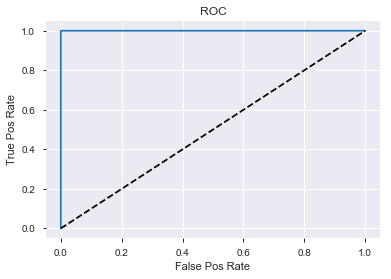

In [102]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr, linestyle='--', color='k')
plt.title('ROC')
plt.xlabel('False Pos Rate')
plt.ylabel('True Pos Rate');